In [1]:
import pandas as pd

# Assume the dataset file is named 'diabetes.csv' and is stored in the current working directory
df = pd.read_csv("diabetes.csv")

# Display the first 5 rows of the dataset to confirm successful data loading
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
from sklearn.impute import SimpleImputer

# Load the dataset (assuming the file name is "diabetes.csv")
df = pd.read_csv("diabetes.csv")

# Check the number of missing values in each column
print("Number of missing values in each column:")
print(df.isnull().sum())

# Assume the following columns contain numerical data (based on the given fields)
num_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Apply mean imputation for numerical data
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# If categorical fields exist in the dataset, they can be handled as follows
# For example, assume 'Category' is a categorical variable
# cat_cols = ["Category"]
# cat_imputer = SimpleImputer(strategy='most_frequent')
# df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Check missing values again to confirm they have been handled
print("\nNumber of missing values after imputation:")
print(df.isnull().sum())

# Print the first five rows to verify the results
print("\nSample data:")
print(df.head())


Number of missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Sample data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0         

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assume we have already loaded the dataset using pd.read_csv and stored it in df
# Define numerical feature columns (e.g., selected fields from the diabetes dataset)
numeric_features = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age"
]

# -----------------
# Standardization: Transform data to have a mean of 0 and a standard deviation of 1
# -----------------
std_scaler = StandardScaler()
df_standardized = df.copy()  # Create a copy of the original data to avoid modifying it directly
df_standardized[numeric_features] = std_scaler.fit_transform(df_standardized[numeric_features])

print("Standardized data (mean = 0, standard deviation = 1):")
print(df_standardized.head())

# -----------------
# Normalization: Scale data to a range of 0 to 1
# -----------------
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()  # Create a copy of the original data
df_normalized[numeric_features] = minmax_scaler.fit_transform(df_normalized[numeric_features])

print("Normalized data (range 0 to 1):")
print(df_normalized.head())


Standardized data (mean = 0, standard deviation = 1):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  
Normalized data (range 0 to 1):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.50074

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Assume the dataset has already been loaded into df
print("Column names in the dataset:", df.columns)

# Select 'Outcome' as the categorical variable for encoding (Note: Outcome is typically a binary label)
categorical_features = ["Outcome"]

# Using scikit-learn's OneHotEncoder (newer versions require sparse_output=False)
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Outcome' column
encoded_array = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

# Remove the original 'Outcome' column from the dataset and concatenate the encoded DataFrame
df_encoded = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)

print("Sample of the encoded dataset:")
print(df_encoded.head())


Column names in the dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Sample of the encoded dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome_0  Outcome_1  
0                     0.627  50.0        0.0        1.0  
1                     0.351  31.0        1.0        0.0  
2                     0.672  32.0        0.0        1.0  
3                     0.167  21.0        1.0        0.0  
4                     2.288  33.0        0.0        1.0 

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assume the dataset has been loaded into the DataFrame df with the following column names:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'

# Separate features and target variable
# Here, 'Outcome' is the target variable, and all other columns are features
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Use SelectKBest with f_classif scoring function to select the top k most important features
# For example, select the top 5 features (k=5); you can adjust k as needed
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Output the F-scores for each feature
feature_scores = selector.scores_
feature_names = X.columns
print("F-score for each feature:")
for name, score in zip(feature_names, feature_scores):
    print(f"{name}: {score:.2f}")

# Display the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("\nSelected features:")
print(selected_features)


F-score for each feature:
Pregnancies: 39.67
Glucose: 213.16
BloodPressure: 3.26
SkinThickness: 4.30
Insulin: 13.28
BMI: 71.77
DiabetesPedigreeFunction: 23.87
Age: 46.14

Selected features:
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


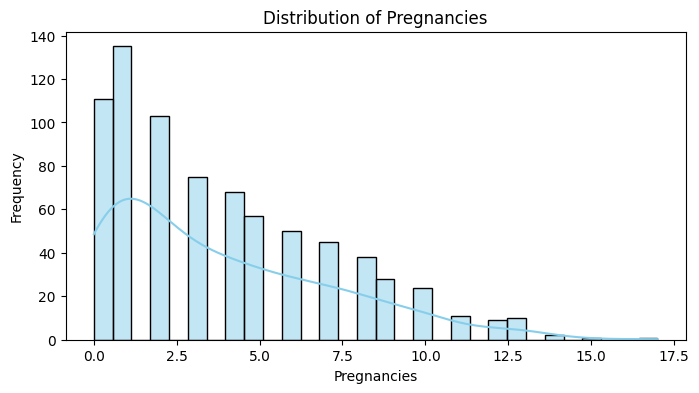

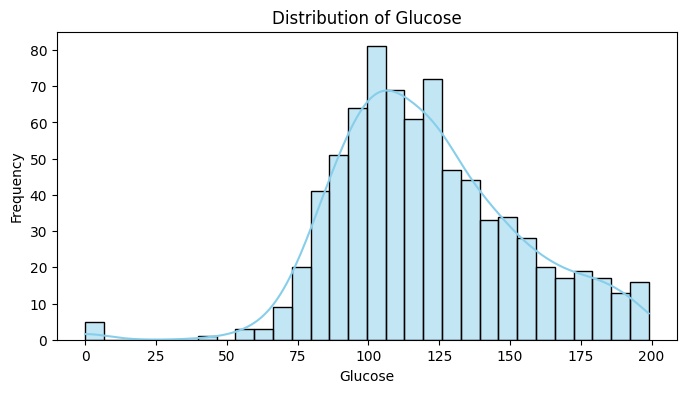

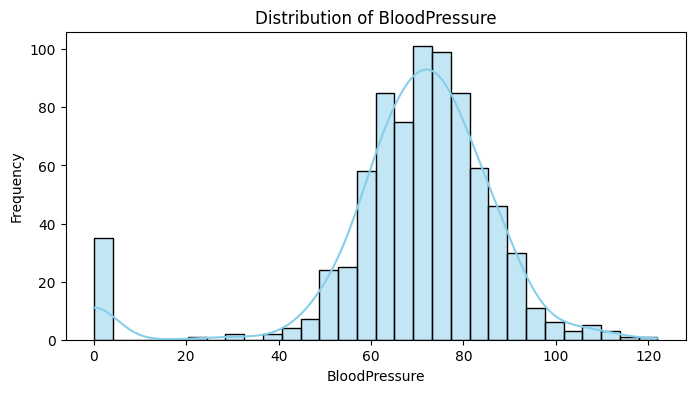

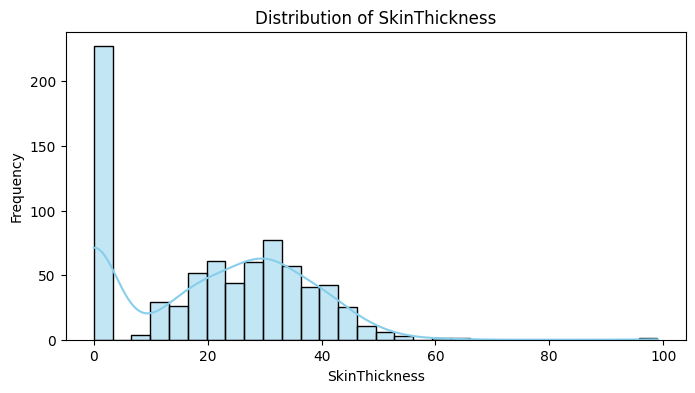

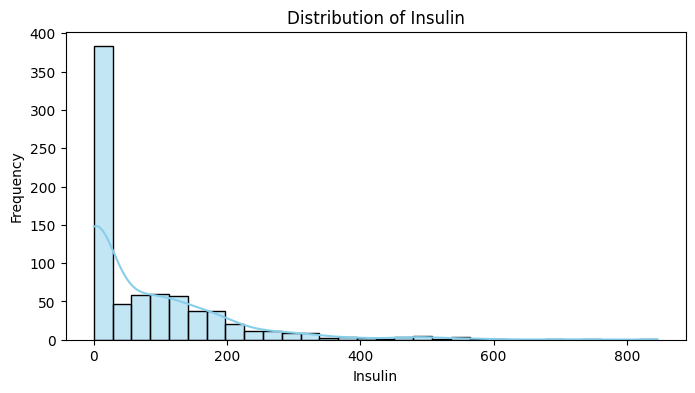

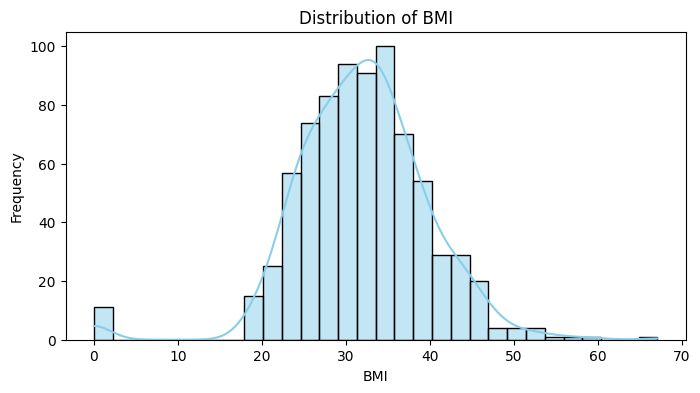

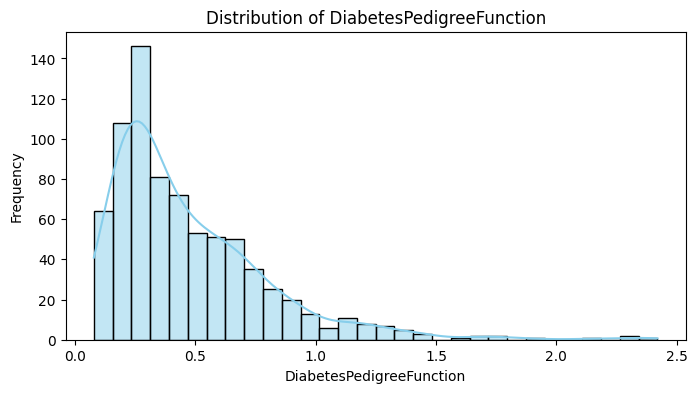

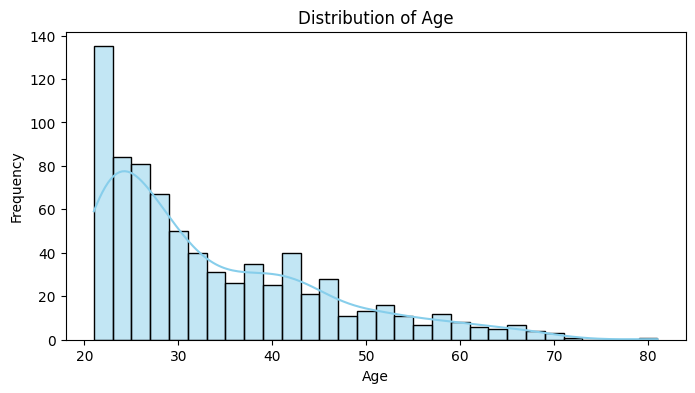

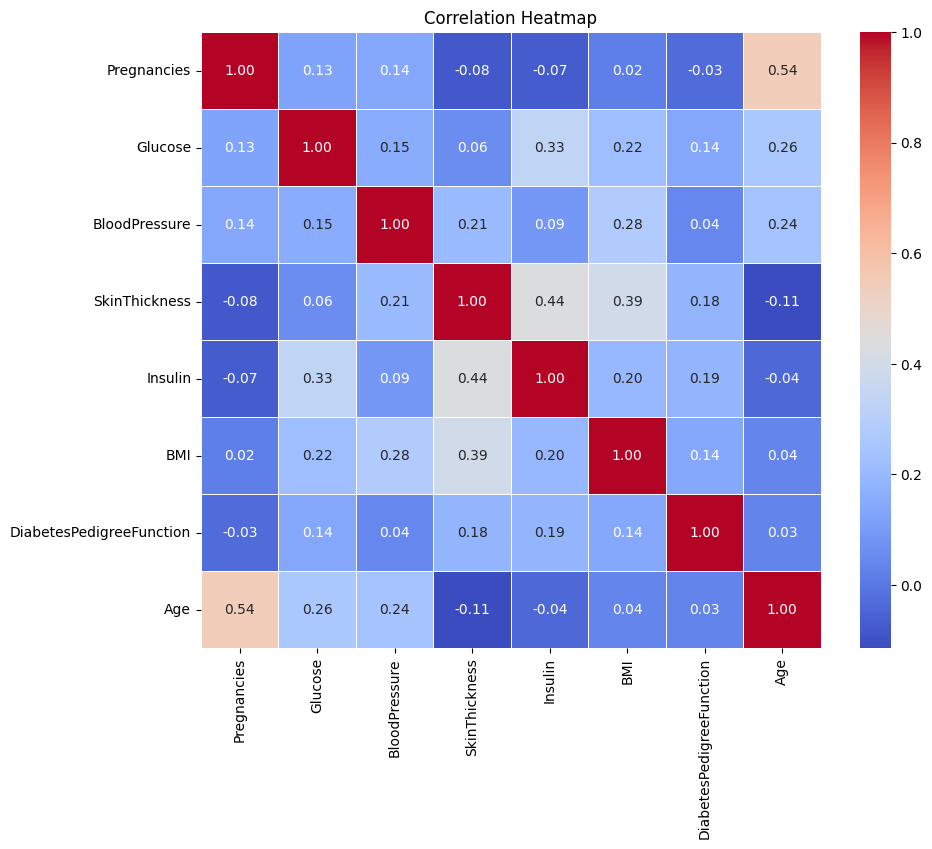

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume the dataset has been loaded into the DataFrame df
# Example:
# df = pd.read_csv("diabetes.csv")

# Numerical feature columns (based on the previous dataset example)
numeric_features = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age"
]

# ------------------------------
# 1. Plot histograms to visualize the distribution of each numerical variable
# ------------------------------
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ------------------------------
# 2. Compute the correlation matrix and plot a heatmap
# ------------------------------
# Calculate the correlation matrix for numerical features
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
